###### Felipe BUZATO FRANÇA COSTA
###### MAP552 - $École Polytechnique$

In [192]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## CPS 3.3 - Two Factor Gaussian Yield Curve

$\textit{Let $B = (B^1,B^2)$ be a Brownian motion in $\mathbb{R}^2$ under the risk-neutral measure $\mathbb{Q}$, and $x_i, \lambda_i, \theta_i, \sigma_i$ be some positive parameters. We assume that the instantaneous interest rate is defined by:}$

\begin{equation*}
    r_t := {X_t}^{(1)} + {X_t}^{(2)}, \qquad where \qquad d{X_t}^{(i)} = \lambda_i (\theta_i - {X_t}^{(i)})dt + \sigma_i d{B_t}^i, \qquad {X_0}^{(i)} = x_i, i=1,2
\end{equation*}

$\textit{The no-arbitrage price of the $T$-maturity zero-coupon bond is given by $P_0 (T) := \mathbb{E}^{\mathbb{Q}}[e^{-\int_{0}^{T} r_t dt}]$, inducing the yields to maturity $R_0(T) := -\frac{ln P_0 (T)}{T}$:}$

\begin{equation*}
    R_0(T) = \rho_1 (T) + \rho_2 (T), \space \space for \space all \space T\geq0,
\end{equation*}

$\textit{with $\rho_i (T) = \theta_i + (x_i - \theta_i) \frac{\Lambda_t (T)}{T} - \frac{\sigma_t^2}{2T} \int_{0}^{T} \Lambda_i(t)^2 dt$, and $\Lambda_i (t) := \frac{1-e^{-\lambda_it}}{\lambda_i} $}$.

$\qquad 1.$ Fix some maturity $T > 0$, a number of time steps $n$, and set $h := T/n, t_j = jh, j=0,...,n$. By Itô's formula, we have $X_{t_j}^{(i)} = \theta_i + (X_{t_{j-1}}^{(i)} - \theta_i) e^{-\lambda_t h} + \sigma_i \int_{t_{j-1}}^{t_j} e^{-\lambda_t(t_j-s)}dB_{s}^{i},$ $j=1,...,n, i=1,2.$

$\qquad a)$ Build a program which simulates $M$ trajectories of the instantaneous rate $\{ r_{t_j},j=0,...,n \}.$

$\textbf{OBS:}$ In the following code, the stochastic integral from the formula of $X_{t_j}^{(i)}$ will be simulated as a normal random variable, as the stochastic integral of a deterministic function is a centered gaussian. Its variance is given by $\int_{t_{j-1}}^{t_j} e^{-2\lambda_i (t_j - s)}ds = \frac{1}{2\lambda_i} (1-e^{-2\lambda_i h})$

In [193]:
def inst_rate(M, n, sigma_=[0,0], theta_=[0,0], lambda_=[0,0], T_=1, x0=[0,0]):
    delta_T = T_/n
    
    # Matrixes that will contain the M simulations with n time steps, and the interest rate, respectively
    X_1, X_2 = np.zeros((M, n)), np.zeros((M, n))
    interest_rate = np.zeros((M, n))
    
    # Initial values
    X_1[:, 0], X_2[:, 0] = x0[0], x0[1]
    
    # This process is a composition of a drift that depends on the last position and a stochastic integral
    drift = np.zeros((2, M))
    stoc_integral = np.zeros((2, M))
    
    # Variance of the stochastic integral
    var_integral_1 = (1/(2*lambda_[0]))*(1-np.exp(-2*lambda_[0]*delta_T))
    var_integral_2 = (1/(2*lambda_[1]))*(1-np.exp(-2*lambda_[1]*delta_T))
    
    for j in range(1, n):        
        # Sampling the stochastic integrals
        stoc_integral[0] = sigma_[0] * np.random.normal(0, np.sqrt(var_integral_1), M)
        stoc_integral[1] = sigma_[1] * np.random.normal(0, np.sqrt(var_integral_2), M)
        
        # drifts
        drift[0] = theta_[0] + (X_1[:, j-1] - theta_[0])*np.exp(-lambda_[0]*delta_T)
        drift[1] = theta_[1] + (X_2[:, j-1] - theta_[1])*np.exp(-lambda_[1]*delta_T)
        
        # Composing the discrete path
        X_1[:, j] = drift[0] + stoc_integral[0]
        X_2[:, j] = drift[1] + stoc_integral[1]
        
    # Composing the interest rate
    interest_rate = X_1 + X_2
    
    return interest_rate        

C:\Users\Felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


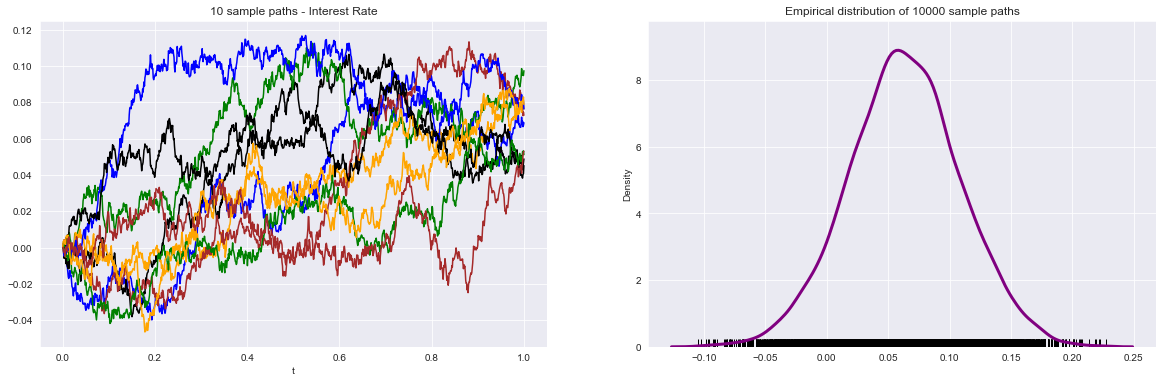

Mean: 0.06331881111539785 
Variance: 0.002089186552616753


In [194]:
# Sampling M instantaneous rates
M = 10000
n = 1000
instantaneous_rate = inst_rate(M, n, sigma_=[0.05, 0.05], theta_=[0.05,0.05], lambda_=[1,1], T_=1)

# Lets plot all the sample paths and see its empirical distribution
time = np.linspace(0, 1, n)
colors = ['blue', 'black', 'green', 'orange', 'brown'] 

fig, ax = plt.subplots(1, 2, figsize=(20,6))
n_samples = 10
for i in range(n_samples):
    ax[0].plot(time, instantaneous_rate[i], color = colors[i%len(colors)])
sns.distplot(instantaneous_rate[:, -1], rug=True, hist=False, rug_kws={"color": "black"},
    kde_kws={"color": "purple", "lw": 3}, ax=ax[1])
ax[0].set_title(str(n_samples) + " sample paths - Interest Rate")
ax[0].set_xlabel('t')
ax[1].set_title("Empirical distribution of %i sample paths"%(M))
plt.show()

print("Mean:", np.mean(instantaneous_rate[:, -1]), "\nVariance:", np.std(instantaneous_rate[:, -1])**2)

As the interest rate is a sum of two Ornstein–Uhlenbeck processes, it follows a gaussian law. In the case whre $\sigma_{1,2} = \theta_{1,2} = 0.05$ and $\lambda_{1,2} = 1$, we should have $\mathbb{E}[X_1] = \mathbb{E}[X_2] = \theta_{1,2} (1-e^{-\lambda_{1,2}T}) \approx 0.0316$. So we should have the expected value $\approx 0.063$. This is exactly what we obtained. Its variance should be $\sigma_{1,2}^2 \frac{1}{\lambda_{1,2}} (1-e^{-2\lambda_{1,2} T}) \approx 0.00216$, which is what we observe. In particular, we see that interest rates can be negative according to this model.

$\qquad b)$ Build a program which computes a Monte Carlo approximation $\hat{P}_0^{n,M} (t_j)$ of the zero-cupom bond approxmiate value $P_0^{n}(t_j) = \mathbb{E}^\mathbb{Q} [e^{-h \sum_{k=1}^{j} r_{t_k}}],$ and the corresponding Monte Carlo approximation of the yields to maturity $\hat{R}_0^{n,M}(t_j).$ 

In [195]:
def monte_carlo(inst_rate, T_=1):
    M = inst_rate.shape[0]
    n = inst_rate.shape[1]
    
    delta_T = T_/n
    
    # Array that will contain the monte carlo approximations for the cupom-bond value for each tj
    bond_value = np.exp(-delta_T*inst_rate[:, 1:].cumsum(axis=1))
    bond_value = bond_value.mean(axis=0)
    
    # Array that will contain the monte carlo approximations for the yields to maturity for each tj
    ts = np.array([j*delta_T for j in range(1,n)])
    yields = -np.log(bond_value)/ts
    
    return yields, bond_value

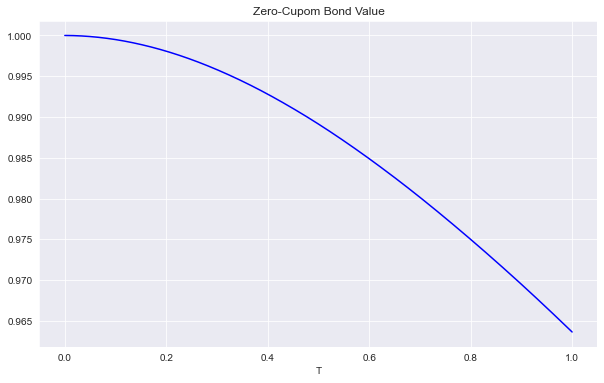

In [196]:
yields, bond_value = monte_carlo(instantaneous_rate)

# Plotting the bond values
time = np.linspace(0, 1, n-1)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(time, bond_value, color = 'blue')
ax.set_title("Zero-Cupom Bond Value")
ax.set_xlabel("T")
plt.show()

As expected, the longer the maturity, the cheaper the bond value is.

$\qquad c)$ Consider the parameters values $\lambda_1 = 1, \lambda_2 = 2, n := 1500, T:=15, M=10^4$, and $\theta_i = 0.05, \sigma_i = 0.05, x_i = 0.02, i=1,2$. Plot the yield curve $ \{ R_0 (t_j), j=0,...,n \}$, and compare to the corresponding Monte-Carlo approximation $\{\hat{R}_0^{n,M}(t_j), j = 0, . . . ,n\}$.

$\textbf{OBS:}$ After computing the integral, the expression for the yield curve is: $R_0 (T) = \rho_1 (T) + \rho_2 (T)$, where $\rho_i (T) = \theta_i + (x_i - \theta_i) \frac{1-e^{-\lambda_i T}}{T\lambda_i} - \frac{\sigma_i^2}{2T}(\frac{T}{\lambda_i^2} + \frac{2e^{-\lambda_i T}}{\lambda_i^3} - \frac{3}{2\lambda_i^3} - \frac{e^{-2\lambda_i T}}{2\lambda_i^3})$.

In [197]:
def yield_curve(M, n, sigma_=[0,0], theta_=[0,0], lambda_=[0,0], T_=1, x0=[0,0]):
    delta_T = T_/n
    time = np.array([j*delta_T for j in range(1,n)])
        
    # Array that will contain the yield to maturity values
    rho_1 = theta_[0] + (x0[0]-theta_[0])*(1-np.exp(-lambda_[0]*time))/(time*lambda_[0]) 
    rho_1 -= ((sigma_[0]**2)/(2*time))*(time/lambda_[0]**2 + 2*np.exp(-lambda_[0]*time)/lambda_[0]**3 -3/(2*lambda_[0]**3) - np.exp(-2*lambda_[0]*time)/(2*lambda_[0]**3))
    rho_2 = theta_[1] + (x0[1]-theta_[1])*(1-np.exp(-lambda_[1]*time))/(time*lambda_[1])
    rho_2 -= ((sigma_[1]**2)/(2*time))*(time/lambda_[1]**2 + 2*np.exp(-lambda_[1]*time)/lambda_[1]**3 -3/(2*lambda_[1]**3) - np.exp(-2*lambda_[1]*time)/(2*lambda_[1]**3))
    yield_ = rho_1 + rho_2
    
    return yield_

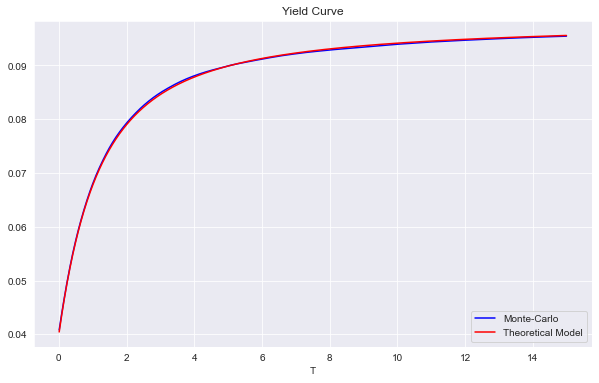

In [198]:
M, n = 10000, 1500
sigma, theta, lambda_ = [0.05, 0.05], [0.05, 0.05], [1, 2]
T = 15
x0 = [0.02, 0.02]

# Yield Curve
yields = yield_curve(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)

# Monte Carlo
instantaneous_rate = inst_rate(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)
yields_MC, bond_value_MC = monte_carlo(instantaneous_rate, T_=T)

# Plotting the yield curve and its monte carlo approximation
time = np.array([j*T/n for j in range(1,n)])
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(time, yields_MC, color = 'blue', label="Monte-Carlo")
ax.plot(time, yields, color = 'red', label="Theoretical Model")
ax.set_title("Yield Curve")
ax.set_xlabel("T")
ax.legend(loc="lower right")
plt.show()

As we can see, our Monte-Carlo approximation is very precise, since both curves seem to be the same at all points.

$\qquad 2.$ Under the parameters values of Question $1c$, comment the effect of $x_i$ on the Monte-Carlo approximation, by 

$\qquad a)$ fixing $x_2$ and varying $x_1$ in $\{0.01, 0.02, 0.05\}$.

$\qquad b)$ fixing $x_1$ and varying $x_2$ in $\{0.01, 0.02, 0.05\}$.

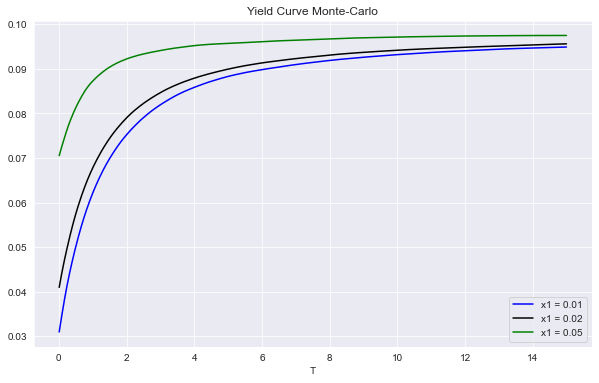

In [199]:
# a)
x1_grid = [0.01, 0.02, 0.05]
MC_grid_x1 = np.zeros((len(x1_grid), n-1))

# Sampling the monte-carlo estimations for each value of the grid
for i in range(len(x1_grid)):
    x0 = [x1_grid[i], 0.02]
    instantaneous_rate = inst_rate(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)
    MC_grid_x1[i], _ = monte_carlo(instantaneous_rate, T_=T)
    
# Plotting the results
time = np.array([j*T/n for j in range(1,n)])
colors = ['blue', 'black', 'green', 'orange', 'brown'] 
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(x1_grid)):
    ax.plot(time, MC_grid_x1[i], color = colors[i%len(colors)], label="x1 = "+str(x1_grid[i]))
ax.set_title("Yield Curve Monte-Carlo")
ax.set_xlabel("T")
ax.legend(loc="lower right")
plt.show()

As we can see, the effect of changing the values of $x_1$ are: the starting point for shorter maturities increases, and it shifts upwardly the curve as $x_1$ increases. This shift does not seem to be perfectly parallel, it seems to be stronger for shorter maturities than for longer maturities (where the curves seem to converge to very close points). We can thus generally say that increasing $x_1$ decreases the slope of the curve.

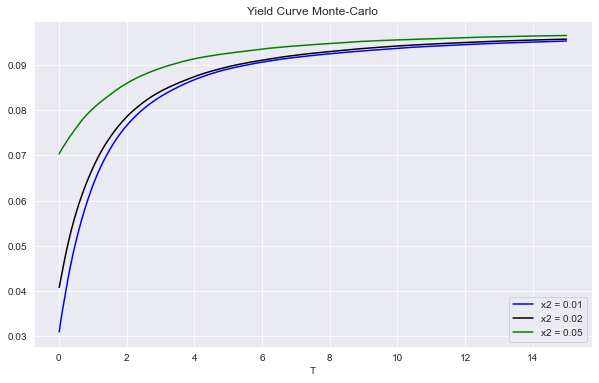

In [200]:
# b)
x2_grid = [0.01, 0.02, 0.05]
MC_grid_x2 = np.zeros((len(x2_grid), n-1))

# Sampling the monte-carlo estimations for each value of the grid
for i in range(len(x2_grid)):
    x0 = [0.02, x2_grid[i]]
    instantaneous_rate = inst_rate(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)
    MC_grid_x2[i], _ = monte_carlo(instantaneous_rate, T_=T)
    
# Plotting the results
time = np.array([j*T/n for j in range(1,n)])
colors = ['blue', 'black', 'green', 'orange', 'brown'] 
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(x2_grid)):
    ax.plot(time, MC_grid_x2[i], color = colors[i%len(colors)], label="x2 = "+str(x2_grid[i]))
ax.set_title("Yield Curve Monte-Carlo")
ax.set_xlabel("T")
ax.legend(loc="lower right")
plt.show()

As we can see, the effect of changing the values of $x_2$ are the same as varying $x_1$. The difference here is that the curves seem to have less concavity. 

$\qquad 3.$ Under the parameters values of Question $1c$, comment the effect of $\theta_i$ on the Monte-Carlo approximation, by 

$\qquad a)$ fixing $\theta_2$ and varying $\theta_1$ in $\{0.01, 0.05, 0.1\}$.

$\qquad b)$ fixing $\theta_1$ and varying $\theta_2$ in $\{0.01, 0.05, 0.1\}$.

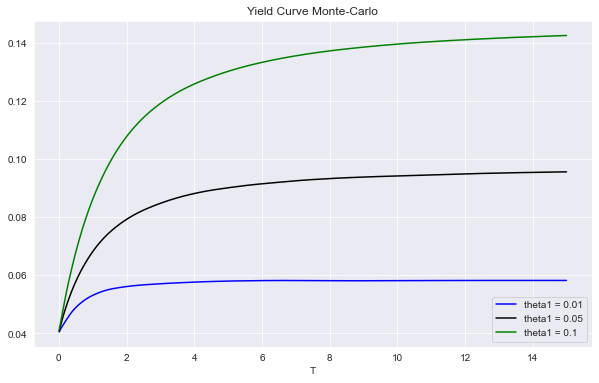

In [201]:
# a)
x0 = [0.02, 0.02]
theta1_grid = [0.01, 0.05, 0.1]
MC_grid_theta1 = np.zeros((len(theta1_grid), n-1))

# Sampling the monte-carlo estimations for each value of the grid
for i in range(len(theta1_grid)):
    theta = [theta1_grid[i], 0.05]
    instantaneous_rate = inst_rate(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)
    MC_grid_theta1[i], _ = monte_carlo(instantaneous_rate, T_=T)
    
# Plotting the results
time = np.array([j*T/n for j in range(1,n)])
colors = ['blue', 'black', 'green', 'orange', 'brown'] 
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(theta1_grid)):
    ax.plot(time, MC_grid_theta1[i], color = colors[i%len(colors)], label="theta1 = "+str(theta1_grid[i]))
ax.set_title("Yield Curve Monte-Carlo")
ax.set_xlabel("T")
ax.legend(loc="lower right")
plt.show()

As we can see, the effect of changing the values of $\theta_1$ are: the final point for longer maturities increases as $\theta_1$ increases. The starting point (shorter maturities) does not change. We can thus generally say that increasing $\theta_1$ increases the slope of the curve. We can also notice that the concavity of the curve decreases.

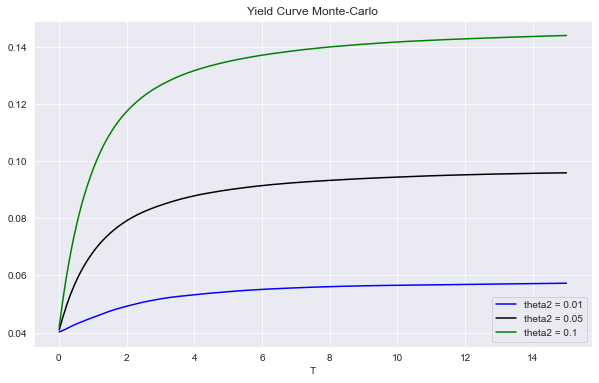

In [202]:
# b)
x0 = [0.02, 0.02]
theta2_grid = [0.01, 0.05, 0.1]
MC_grid_theta2 = np.zeros((len(theta2_grid), n-1))

# Sampling the monte-carlo estimations for each value of the grid
for i in range(len(theta2_grid)):
    theta = [0.05, theta2_grid[i]]
    instantaneous_rate = inst_rate(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)
    MC_grid_theta2[i], _ = monte_carlo(instantaneous_rate, T_=T)
    
# Plotting the results
time = np.array([j*T/n for j in range(1,n)])
colors = ['blue', 'black', 'green', 'orange', 'brown'] 
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(theta2_grid)):
    ax.plot(time, MC_grid_theta2[i], color = colors[i%len(colors)], label="theta2 = "+str(theta2_grid[i]))
ax.set_title("Yield Curve Monte-Carlo")
ax.set_xlabel("T")
ax.legend(loc="lower right")
plt.show()

As we can see, the effect of changing the values of $\theta_2$ are the same as varying $\theta_1$. The difference here is that the concavity of the curves seem to increase as $\theta_2$ increases. 

$\qquad 4.$ Under the parameters values of Question $1c$, comment the effect of $\sigma_i$ on the Monte-Carlo approximation, by 

$\qquad a)$ fixing $\sigma_2$ and varying $\sigma_1$ in $\{0.01, 0.05, 0.1\}$.

$\qquad b)$ fixing $\sigma_1$ and varying $\sigma_2$ in $\{0.01, 0.05, 0.1\}$.

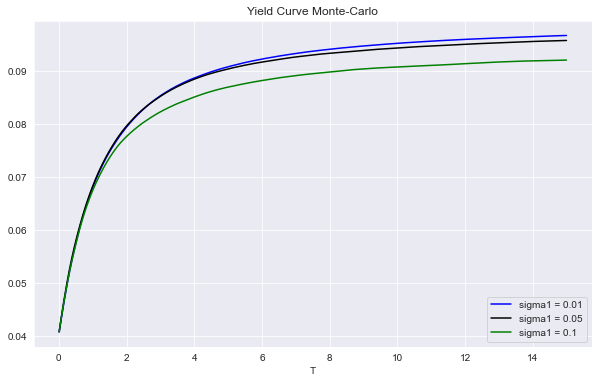

In [203]:
# a)
theta = [0.05, 0.05]
sigma1_grid = [0.01, 0.05, 0.1]
MC_grid_sigma1 = np.zeros((len(sigma1_grid), n-1))

# Sampling the monte-carlo estimations for each value of the grid
for i in range(len(sigma1_grid)):
    sigma = [sigma1_grid[i], 0.05]
    instantaneous_rate = inst_rate(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)
    MC_grid_sigma1[i], _ = monte_carlo(instantaneous_rate, T_=T)
    
# Plotting the results
time = np.array([j*T/n for j in range(1,n)])
colors = ['blue', 'black', 'green', 'orange', 'brown'] 
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(sigma1_grid)):
    ax.plot(time, MC_grid_sigma1[i], color = colors[i%len(colors)], label="sigma1 = "+str(sigma1_grid[i]))
ax.set_title("Yield Curve Monte-Carlo")
ax.set_xlabel("T")
ax.legend(loc="lower right")
plt.show()

As we can see, the effect of changing the values of $\sigma_1$ are: the final point for longer maturities decreases as $\sigma_1$ increases (we see a small upward shift only for long maturities). From $T=0$ to $T=1$ the curves are almost the same. Compared to the previous case (varying $\theta$), the shifts are way less intense.

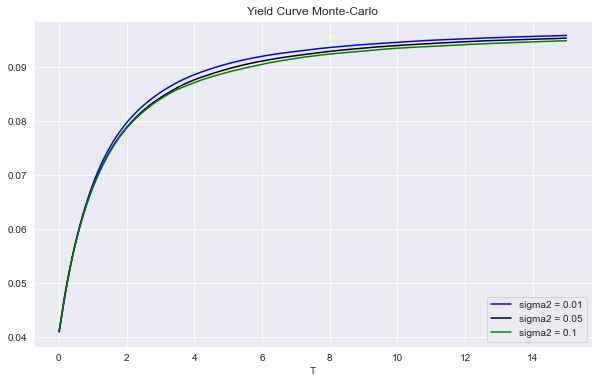

In [204]:
# b)
theta = [0.05, 0.05]
sigma2_grid = [0.01, 0.05, 0.1]
MC_grid_sigma2 = np.zeros((len(sigma2_grid), n-1))

# Sampling the monte-carlo estimations for each value of the grid
for i in range(len(sigma2_grid)):
    sigma = [0.05, sigma2_grid[i]]
    instantaneous_rate = inst_rate(M=M, n=n, sigma_=sigma, theta_=theta, lambda_=lambda_, T_=T, x0=x0)
    MC_grid_sigma2[i], _ = monte_carlo(instantaneous_rate, T_=T)
    
# Plotting the results
time = np.array([j*T/n for j in range(1,n)])
colors = ['blue', 'black', 'green', 'orange', 'brown'] 
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(sigma2_grid)):
    ax.plot(time, MC_grid_sigma2[i], color = colors[i%len(colors)], label="sigma2 = "+str(sigma2_grid[i]))
ax.set_title("Yield Curve Monte-Carlo")
ax.set_xlabel("T")
ax.legend(loc="lower right")
plt.show()

As we can see, the effect of changing the values of $\sigma_2$ are the same as varying $\sigma_1$. The difference here is that the changes are very small.